<a href="https://colab.research.google.com/github/adbioc/video2image/blob/main/video2image_thal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import cv2

In [ ]:
os.chdir("/content/drive/My Drive/thermal_video/")


In [ ]:
!ls

2020-02-27T124145430.seq  JYOTIvideodyn.ipynb	      set2_dry_day1.avi
blood_27_02_20.csv	  MVIMG_20200227_172810.jpg   set2_wet_day2.avi
blood_samp_details.txt	  samp_details.txt	      set2_wet_day3.avi
chickpeas.mp4		  set1_dry_day1.avi	      set2_wt_day3later3hrs.avi
chickpeas.mpeg		  set1_dry_day2.avi	      Thalassemia
Control			  set1_dry_day3.avi	      video2image.ipynb
Hemophilia		  set1_dry_day3later3hrs.avi  videodyn.ipynb


## A function to capture a video and determine 
- frameCount 
- frameWidth 
- frameHeight

In [ ]:
def v2im(videofile):
  cap=cv2.VideoCapture(videofile)
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  return(frameCount,frameWidth,frameHeight)

In [ ]:
os.chdir("/content/drive/My Drive/thermal_video/Thalassemia")
C,W,H=v2im('thal1.avi')
print("Frame count=",C,"Image height=",H,"Image Width=",W)

Frame count= 527 Image height= 423 Image Width= 1012


## Extracting n-th frame from a video and show the image 

### First capture the frame buffer 

In [ ]:
fc = 0
ret = True
video='thal1.avi'
buf = np.empty((C, H, W, 3), np.dtype('uint8'))
cap=cv2.VideoCapture(video)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()
buf.shape


(527, 423, 1012, 3)

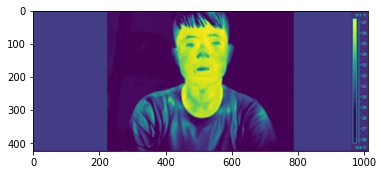

In [ ]:
plt.imshow(buf[0,:,:,1])



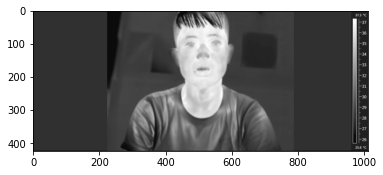

In [ ]:
grayFrame = cv2.cvtColor(buf[10,:,:,:], cv2.COLOR_BGR2GRAY)
plt.imshow(grayFrame,cmap ='gray')

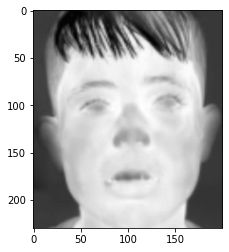

In [ ]:
h=230
w=200
x=410
y=0
crop_img = grayFrame[y:y+h, x:x+w]
crop_img.shape
plt.imshow(crop_img,cmap='gray')

# Function to extract cropped frames 

In [ ]:
def bufproc(video,N):
  cap=cv2.VideoCapture(video)
  frameCount, frameHeight, frameWidth=v2im(video)
  frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
  frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
  frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
  buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
  fc=0
  ret=True
  while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1
  cap.release()
  im=buf[N,:,:,1]
  #plt.imshow(im)
  return im,buf

In [ ]:
im,buf=bufproc('thal2.avi',100)


(418, 1012)

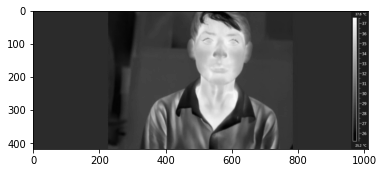

In [ ]:
#plt.imshow(im)
#plt.imshow(im,cmap='gray')
grayFrame = cv2.cvtColor(buf[10,:,:,:], cv2.COLOR_BGR2GRAY)
plt.imshow(grayFrame,cmap ='gray')
grayFrame.shape

## Extracts a frame N from a video , converts it to gray and then shows the image

In [ ]:
def im2gray(video,N,x,y,h,w):
  im,buf=bufproc(video,N)
  grayFrame = cv2.cvtColor(buf[N,:,:,:], cv2.COLOR_BGR2GRAY)
  crop_img = grayFrame[y:y+h, x:x+w]
  #plt.imshow(crop_img,cmap ='gray')
  return crop_img


h=230
w=200
x=410
y=0
im2gray('thal1.avi',10,x,y,h,w)

array([[67, 67, 67, ..., 61, 61, 61],
       [67, 67, 67, ..., 61, 61, 61],
       [67, 67, 67, ..., 61, 61, 61],
       ...,
       [63, 63, 63, ..., 61, 62, 62],
       [64, 64, 64, ..., 62, 62, 62],
       [64, 64, 64, ..., 62, 62, 63]], dtype=uint8)

In [ ]:
def TS(video,x,y,h,w):
  C,W,H=v2im(video)
  TS = np.zeros(C,)
  for t in range(C):
      crop_img=im2gray(video,t,x,y,h,w)
      i,j = np.where((crop_img>0)&(crop_img<255))
      AA= crop_img[i,j]
      time_series[t] = AA.mean()
      plt.plot(time_series)
  return 0
  

In [ ]:
def TS(video,x,y,h,w,low,high):
  C,W,H=v2im(video)
  TS = np.zeros(C,)
  for t in range(C):
    crop_img=im2gray(video,t,x,y,h,w)
    i,j = np.where((crop_img>low)&(crop_img<high))
    AA= crop_img[i,j]
    TS[t] = AA.mean()
  plt.plot(TS)
  return TS



# Thalassemia

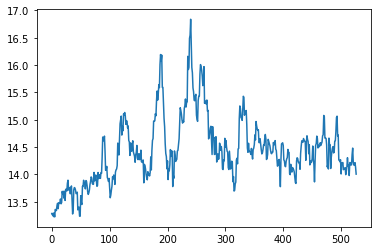

In [ ]:
low=0
high=20
h=230
w=200
x=410
y=0

video='thal1.avi'
TS_thal1=TS(video,x,y,h,w,low,high)



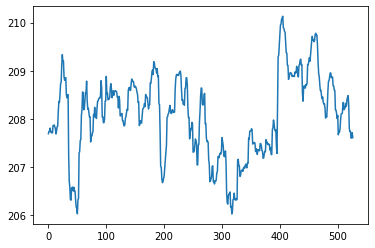

In [ ]:
low=120
high=255
h=230
w=200
x=410
y=0

video='thal1.avi'
TS_thal2=TS(video,x,y,h,w,low,high)
